In [1]:
import time
import csv
import bs4 as bs
import pandas as pd
import regex as re 
import pickle 
import warnings

warnings.filterwarnings("ignore")

from urllib.request import FancyURLopener
from random import choice
from bs4 import SoupStrainer, BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
driver = webdriver.Chrome("/usr/local/bin/chromedriver", chrome_options=chrome_options)

user_agents = [
    "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36",
    "Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16",
    "Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246",
]


class MyOpener(FancyURLopener, object):
    version = choice(user_agents)

myopener = MyOpener()

# Scraping neutral subreddits

In [2]:
starter_url = "https://old.reddit.com/r/NeutralPolitics"
driver.get(starter_url)

title_list = []
upvotes_list = []
current_url = starter_url
for x in range(30):
    page = myopener.open(current_url)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    titles_upvotes = soup.select(".unvoted")
    x = 0
    while x < len(titles_upvotes):
        if "•" == titles_upvotes[x + 1].get_text():
            x = x + 3
            continue
        else:
            upvotes_list.append(str(titles_upvotes[x + 1]).split('="')[2].split('"')[0])
            title_list.append(titles_upvotes[x + 2].get_text().split(" (")[0])
            x = x + 3

    time.sleep(5)

    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

In [ ]:
starter_url = "https://old.reddit.com/r/news"
driver.get(starter_url)

current_url = starter_url
for x in range(30):
    page = myopener.open(current_url)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    titles_upvotes = soup.select(".unvoted")
    x = 0
    while x < len(titles_upvotes):
        if "•" == titles_upvotes[x + 1].get_text():
            x = x + 3
            continue
        else:
            upvotes_list.append(str(titles_upvotes[x + 1]).split('="')[2].split('"')[0])
            title_list.append(titles_upvotes[x + 2].get_text().split(" (")[0])
            x = x + 3

    time.sleep(5)

    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

# Scraping left leaning subreddits

### /r/Democrats

In [304]:
starter_url = "https://old.reddit.com/r/Democrats"
driver.get(starter_url)

left_title_list = []
left_upvotes_list = []
current_url = starter_url
for x in range(20):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles_upvotes = soup.select('.unvoted')
    x = 0
    while x < len(titles_upvotes):
        if '•' == titles_upvotes[x+1].get_text():
            x = x + 3
            continue
        else:
            left_upvotes_list.append(str(titles_upvotes[x+1]).split("=\"")[2].split("\"")[0])
            left_title_list.append(titles_upvotes[x+2].get_text().split(' (')[0])
            x = x + 3
            
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

### /r/politics

In [305]:
starter_url = "https://old.reddit.com/r/politics"
driver.get(starter_url)

current_url = starter_url
for x in range(20):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles_upvotes = soup.select('.unvoted')
    x = 0
    while x < len(titles_upvotes):
        if '•' == titles_upvotes[x+1].get_text():
            x = x + 3
            continue
        else:
            left_upvotes_list.append(str(titles_upvotes[x+1]).split("=\"")[2].split("\"")[0])
            left_title_list.append(titles_upvotes[x+2].get_text().split(' (')[0])
            x = x + 3
            
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

### /r/esist

In [306]:
starter_url = "https://old.reddit.com/r/esist"
driver.get(starter_url)

current_url = starter_url
for x in range(20):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles_upvotes = soup.select('.unvoted')
    x = 0
    while x < len(titles_upvotes):
        if '•' == titles_upvotes[x+1].get_text():
            x = x + 3
            continue
        else:
            left_upvotes_list.append(str(titles_upvotes[x+1]).split("=\"")[2].split("\"")[0])
            left_title_list.append(titles_upvotes[x+2].get_text().split(' (')[0])
            x = x + 3
            
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

### /r/liberal

In [ ]:
starter_url = "https://old.reddit.com/r/liberal"
driver.get(starter_url)

current_url = starter_url
for x in range(20):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles_upvotes = soup.select('.unvoted')
    x = 0
    while x < len(titles_upvotes):
        if '•' == titles_upvotes[x+1].get_text():
            x = x + 3
            continue
        else:
            left_upvotes_list.append(str(titles_upvotes[x+1]).split("=\"")[2].split("\"")[0])
            left_title_list.append(titles_upvotes[x+2].get_text().split(' (')[0])
            x = x + 3
            
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

# Scraping right leaning subreddits

### /r/Conservative

In [211]:
starter_url = "https://old.reddit.com/r/Conservative"
driver.get(starter_url)

right_title_list = []
right_upvotes_list = []
current_url = starter_url
for x in range(20):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles_upvotes = soup.select('.unvoted')
    x = 0
    while x < len(titles_upvotes):
        if '•' == titles_upvotes[x+1].get_text():
            x = x + 3
            continue
        else:
            right_upvotes_list.append(str(titles_upvotes[x+1]).split("=\"")[2].split("\"")[0])
            right_title_list.append(titles_upvotes[x+2].get_text().split(' (')[0])
            x = x + 3
            
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

### /r/The_Donald

In [212]:
starter_url = "https://old.reddit.com/r/The_Donald"
driver.get(starter_url)
continue_button = driver.find_element_by_css_selector("button[type='submit']")
continue_button.click()
current_url_new = driver.current_url

current_url = current_url_new
for x in range(20):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles_upvotes = soup.select('.unvoted')
    x = 0
    while x < len(titles_upvotes):
        if '•' == titles_upvotes[x+1].get_text():
            x = x + 3
            continue
        else:
            right_upvotes_list.append(str(titles_upvotes[x+1]).split("=\"")[2].split("\"")[0])
            right_title_list.append(titles_upvotes[x+2].get_text().split(' (')[0])
            x = x + 3
            
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

### /r/republican

In [213]:
starter_url = "https://old.reddit.com/r/republican"
driver.get(starter_url)

current_url = starter_url
for x in range(20):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles_upvotes = soup.select('.unvoted')
    x = 0
    while x < len(titles_upvotes):
        if '•' == titles_upvotes[x+1].get_text():
            x = x + 3
            continue
        else:
            right_upvotes_list.append(str(titles_upvotes[x+1]).split("=\"")[2].split("\"")[0])
            right_title_list.append(titles_upvotes[x+2].get_text().split(' (')[0])
            x = x + 3
            
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

### /r/TheRightBoycott

In [214]:
starter_url = "https://old.reddit.com/r/TheRightBoycott"
driver.get(starter_url)

current_url = starter_url
for x in range(20):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles_upvotes = soup.select('.unvoted')
    x = 0
    while x < len(titles_upvotes):
        if '•' == titles_upvotes[x+1].get_text():
            x = x + 3
            continue
        else:
            right_upvotes_list.append(str(titles_upvotes[x+1]).split("=\"")[2].split("\"")[0])
            right_title_list.append(titles_upvotes[x+2].get_text().split(' (')[0])
            x = x + 3
            
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

# Text cleaning and modeling

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import regex
import nltk
import spacy
import scipy.sparse
import pyLDAvis
import pyLDAvis.gensim
import gensim.corpora as corpora

from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import matutils, models
from itertools import chain
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.utils import shuffle
from nltk.corpus import stopwords

from collections import defaultdict
from statistics import mean

plt.rcParams["figure.figsize"] = [20, 10]

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [308]:
stop_words = set(stopwords.words("english"))
stop_words.add('u')
stop_words.add('r')

def text_cleaner(text):
    text = regex.sub("[^a-zA-Z]", " ", text)
    text = " ".join(text.split())
    text = text.lower()
    return text
            
neutral_titles = [text_cleaner(x) for x in title_list]
right_titles = [text_cleaner(x) for x in right_title_list]
left_titles = [text_cleaner(x) for x in left_title_list]

## Neutral titles wordcount

In [309]:
wordCount_n = defaultdict(int)
totalWords = 0

for title in neutral_titles:
    t = title
    t = "".join(t)
    words = t.strip().split()
    for w in words:
        if w in stop_words:
            continue
        else:
            totalWords += 1
            wordCount_n[w] += 1

In [310]:
counts_n = [(wordCount_n[w], w) for w in wordCount_n]
counts_n.sort()
counts_n.reverse()
counts_n[:10]

[(104, 'trump'),
 (102, 'us'),
 (68, 'president'),
 (61, 'states'),
 (52, 'new'),
 (49, 'pros'),
 (49, 'cons'),
 (48, 'legal'),
 (43, 'law'),
 (41, 'state')]

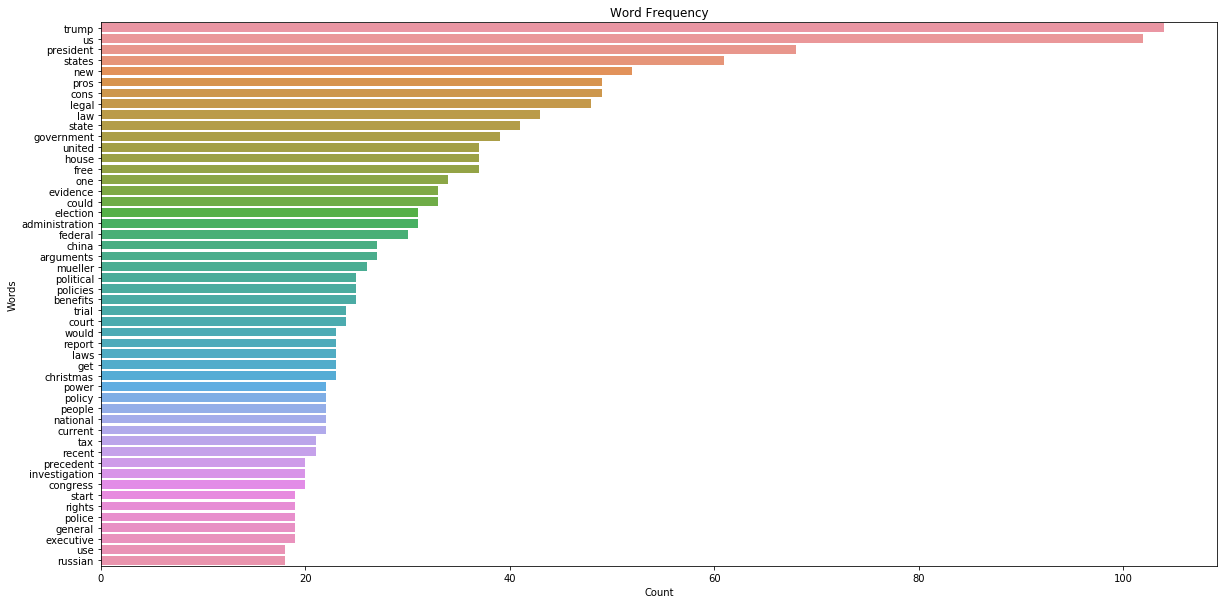

In [311]:
words_df_n = pd.DataFrame.from_dict(counts_n)
sns.barplot(data=words_df_n[:50], x=0, y=1)
plt.xlabel("Count")
plt.ylabel("Words")
plt.title("Word Frequency")
plt.show()

## Right titles wordcount

In [312]:
wordCount_r = defaultdict(int)
totalWords = 0

for title in right_titles:
    t = title
    t = "".join(t)
    words = t.strip().split()
    for w in words:
        if w in stop_words:
            continue
        else:
            totalWords += 1
            wordCount_r[w] += 1

In [313]:
counts_r = [(wordCount_r[w], w) for w in wordCount_r]
counts_r.sort()
counts_r.reverse()
counts_r[:10]

[(247, 'trump'),
 (163, 'impeachment'),
 (103, 'christmas'),
 (91, 'democrats'),
 (79, 'boycott'),
 (72, 'new'),
 (60, 'boycottboycott'),
 (59, 'support'),
 (53, 'one'),
 (43, 'time')]

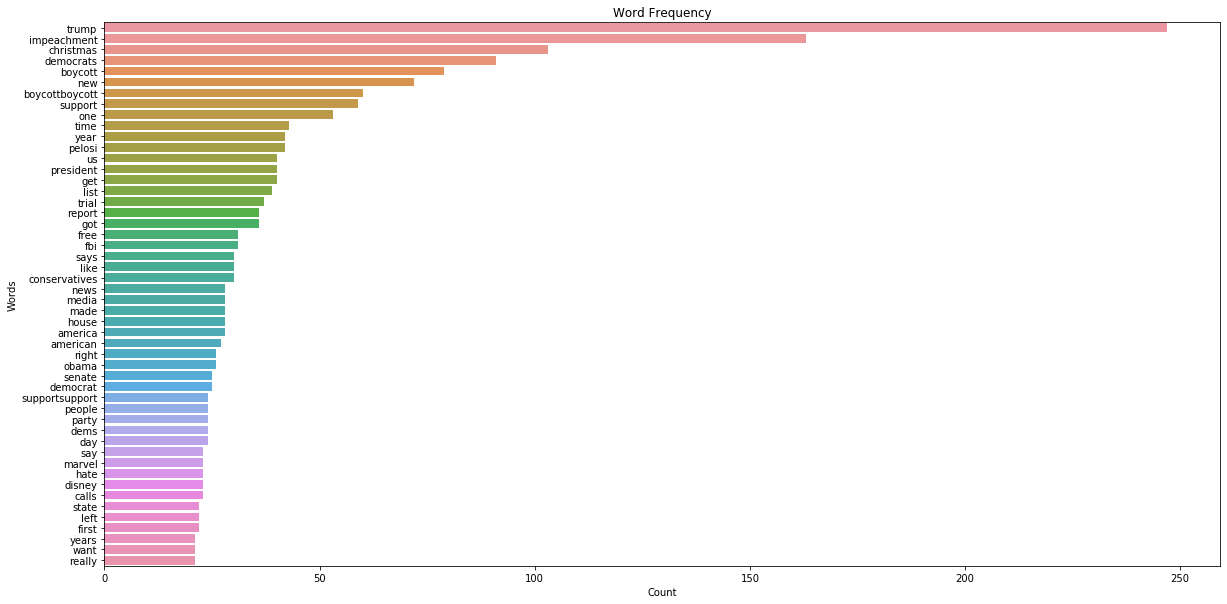

In [314]:
words_df_r = pd.DataFrame.from_dict(counts_r)
sns.barplot(data=words_df_r[:50], x=0, y=1)
plt.xlabel("Count")
plt.ylabel("Words")
plt.title("Word Frequency")
plt.show()

## Left titles wordcount

In [315]:
wordCount_l = defaultdict(int)
totalWords = 0

for title in left_titles:
    t = title
    t = "".join(t)
    words = t.strip().split()
    for w in words:
        if w in stop_words:
            continue
        else:
            totalWords += 1
            wordCount_l[w] += 1

In [316]:
counts_l = [(wordCount_l[w], w) for w in wordCount_l]
counts_l.sort()
counts_l.reverse()
counts_l[:10]

[(807, 'trump'),
 (232, 'impeachment'),
 (129, 'president'),
 (126, 'house'),
 (99, 'ukraine'),
 (96, 'says'),
 (88, 'new'),
 (87, 'democrats'),
 (79, 'one'),
 (75, 'white')]

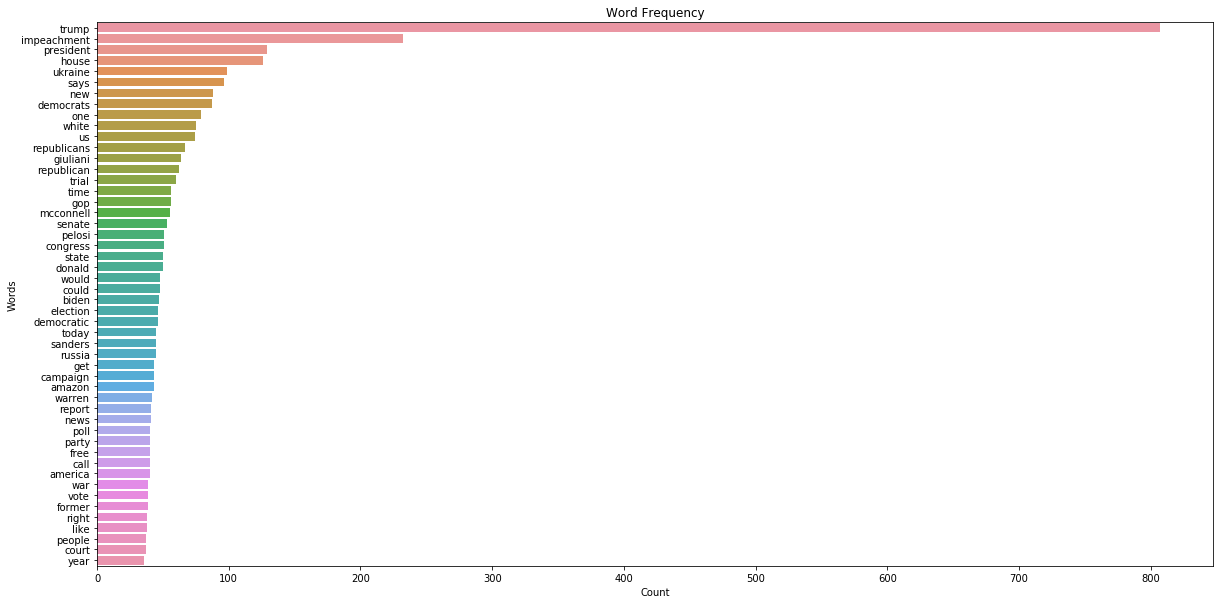

In [317]:
words_df_l = pd.DataFrame.from_dict(counts_l)
sns.barplot(data=words_df_l[:50], x=0, y=1)
plt.xlabel("Count")
plt.ylabel("Words")
plt.title("Word Frequency")
plt.show()

# Model Building

In [326]:
neutral_titles_final = []
right_titles_final = []
left_titles_final = []

for title in neutral_titles:
    title = [words for words in title.split() if words not in stop_words]
    title = " ".join(title)
    neutral_titles_final.append(title)
    
for title in right_txitles:
    title = [words for words in title.split() if words not in stop_words]
    title = " ".join(title)
    right_titles_final.append(title)
    
for title in left_titles:
    title = [words for words in title.split() if words not in stop_words]
    title = " ".join(title)
    left_titles_final.append(title)

In [384]:
y_neutral = [int(x) for x in upvotes_list]
y_right = [int(x) for x in right_upvotes_list]
y_left = [int(x) for x in left_upvotes_list]

In [387]:
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(neutral_titles, y_neutral, test_size=0.25)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(right_titles, y_right, test_size=0.25)
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(left_titles, y_left, test_size=0.25)

estimators = [("tf_idf", TfidfVectorizer()), 
              ("ridge", linear_model.Ridge())]

model_neutral = Pipeline(estimators)
model_left = Pipeline(estimators)
model_right = Pipeline(estimators)

In [388]:
model_neutral.fit(X_train_n, y_train_n)

Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
   

In [389]:
model_left.fit(X_train_l, y_train_l)

Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
   

In [390]:
model_right.fit(X_train_r, y_train_r)

Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
   

In [394]:
params = {"ridge__alpha":[0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1, 3, 5, 10], 
          "tf_idf__min_df": [1, 2, 3, 4, 5], 
          "tf_idf__ngram_range": [(1,1), (1,2)], 
          "tf_idf__stop_words": [None, "english"]}

In [395]:
grid_neutral = GridSearchCV(estimator = model_neutral, param_grid = params)
grid_right = GridSearchCV(estimator = model_right, param_grid = params)
grid_left = GridSearchCV(estimator = model_left, param_grid = params)

grid_neutral.fit(X_train_n, y_train_n)
grid_right.fit(X_train_r, y_train_r)
grid_left.fit(X_train_l, y_train_l)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf_idf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                   

In [397]:
grid_neutral.best_estimator_

Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solv

In [399]:
grid_right.best_estimator_

Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('ridge',
                 Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solve

In [400]:
grid_left.best_estimator_

Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=4, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solv

In [412]:
def score_predictor(text: str):
    text = text_cleaner(text)
    text = [text]
    which_affiliation = input("Will you be posting on a neutral, left or right leaning subreddit (n, l, r): ")
    if which_affiliation == 'n':
        return grid_neutral.predict(text)
    elif which_affiliation == 'l':
        return grid_left.predict(text)
    elif which_affiliation == 'r':
        return grid_right.predict(text)
    else:
        print('False input, try again')
        score_predictor(text)

.

.


.

In [670]:
neutral_titles_df = pd.DataFrame(data = {'titles': neutral_titles})
left_titles_df = pd.DataFrame(data = {'titles': left_titles})
right_titles_df = pd.DataFrame(data = {'titles': right_titles})

neutral_titles_df.to_csv("neutral_titles.csv", sep = ',', index = False)
left_titles_df.to_csv("left_titles.csv", sep = ',', index = False)
right_titles_df.to_csv("right_titles.csv", sep = ',', index = False)

# Scraping reddit comments

## Left leaning comments

In [ ]:
starter_url = "https://old.reddit.com/r/liberal"
driver.get(starter_url)

links_list = []
current_url = starter_url
for x in range(15):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.select('.may-blank')

    for link in links:
        if 'class' in link.attrs and 'comments' in link['class']:
            links_list.append(link['href'])
        
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

In [643]:
starter_url = "https://old.reddit.com/r/politics"
driver.get(starter_url)

current_url = starter_url
for x in range(15):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.select('.may-blank')

    for link in links:
        if 'class' in link.attrs and 'comments' in link['class']:
            links_list.append(link['href'])
        
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

In [645]:
starter_url = "https://old.reddit.com/r/esist"
driver.get(starter_url)

current_url = starter_url
for x in range(15):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.select('.may-blank')

    for link in links:
        if 'class' in link.attrs and 'comments' in link['class']:
            links_list.append(link['href'])
        
    time.sleep(5)
    
    driver.get(current_url)
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

In [648]:
left_comments_text = []
for links in links_list:
    page = myopener.open(links)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser', multi_valued_attributes = None)
    stuff = soup.select('.commentarea')
    
    for comments in str(stuff).split('<p>')[1:-2]:
        left_comments_text.append(comments.split('</p>')[0])

In [674]:
links_list_df = pd.DataFrame(data={'url': links_list})
left_comments_df = pd.DataFrame(data={'comment_text': left_comments_text})

links_list_df.to_csv("left_links.csv", sep = ',', index = False)
left_comments_df.to_csv("left_comments.csv", sep = ',', index = False)

## Right leaning comments

In [3]:
starter_url = "https://old.reddit.com/r/conservative"

right_links_list = []
current_url = starter_url
for x in range(15):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.select('.may-blank')

    for link in links:
        if 'class' in link.attrs and 'comments' in link['class']:
            right_links_list.append(link['href'])
        
    time.sleep(5)
    
    driver.get(current_url)
    
    time.sleep(5)
    
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

In [ ]:
starter_url = "https://old.reddit.com/r/Libertarian"
driver.get(starter_url)

current_url = starter_url
for x in range(15):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.select('.may-blank')

    for link in links:
        if 'class' in link.attrs and 'comments' in link['class']:
            right_links_list.append(link['href'])
        
    time.sleep(5)
    
    driver.get(current_url)
    
    time.sleep(5)
    
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

In [5]:
starter_url = "https://old.reddit.com/r/republican"
driver.get(starter_url)

current_url = starter_url
for x in range(15):
    page = myopener.open(current_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.select('.may-blank')

    for link in links:
        if 'class' in link.attrs and 'comments' in link['class']:
            right_links_list.append(link['href'])
        
    time.sleep(5)
    
    driver.get(current_url)
    
    time.sleep(5)
    
    button = driver.find_element_by_css_selector("a[rel='nofollow next']")
    button.click()
    current_url = driver.current_url

In [ ]:
right_comments_text = []
for links in right_links_list:
    page = myopener.open(links)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser', multi_valued_attributes = None)
    stuff = soup.select('.commentarea')
    
    for comments in str(stuff).split('<p>')[1:-2]:
        right_comments_text.append(comments.split('</p>')[0])

In [ ]:
right_links_list_df = pd.DataFrame(data={'url': right_links_list})
right_comments_df = pd.DataFrame(data={'comment_text': right_comments_text})

right_links_list_df.to_csv("right_links.csv", sep = ',', index = False)
right_comments_df.to_csv("right_comments.csv", sep = ',', index = False)

In [3]:
right_comments = pd.read_csv('right_comments.csv')
left_comments = pd.read_csv('left_comments.csv')

In [4]:
len(right_comments)

28695

In [5]:
len(left_comments)

60353

#### We can see that with almost 3 times as many left-leaning comments, we will have problems with imbalanced classifiers

## Topic Modeling - Text Cleaning

In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
stop_words.add('href')
stop_words.add('em')
stop_words.add('rel')
stop_words.add('nofollow')
stop_words.add('com')
stop_words.add('www')
stop_words.add('https')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import CountVectorizer 

In [8]:
def text_cleaner(text):
    text = text.replace('[deleted]', "")
    text = re.sub("[^a-zA-Z]", " ", text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

def rem_stopwords(text):
    text_n = []
    if len(text) == 0:
        return None
    for words in text.split():
        if words in stop_words or len(words) <= 1 or 'href' in words:
            continue
        else:
            text_n.append(words)
    text_new = " ".join(text_n)
    return text_new

In [9]:
right_comments_clean = [text_cleaner(i) for i in right_comments['comment_text']]
left_comments_clean = [text_cleaner(i) for i in left_comments['comment_text']]
right_affiliation = ['right-leaning'] * len(right_comments_clean)
left_affiliation = ['left-leaning'] * len(left_comments_clean)

right_userID = list(range(len(right_comments_clean)+1))
left_userID = list(range(len(left_comments_clean)+1))

right_df = pd.DataFrame(list(zip(right_comments_clean, right_affiliation, right_userID)), 
                        columns = ['comment_text', 'affiliation', 'userID'])
left_df = pd.DataFrame(list(zip(left_comments_clean, left_affiliation, left_userID)), 
                       columns = ['comment_text', 'affiliation', 'userID'])
all_list = right_comments_clean + left_comments_clean
all_df = pd.concat([right_df, left_df], ignore_index=True)

In [10]:
all_list_clean = [rem_stopwords(a) for a in all_list if rem_stopwords(a) != None]

In [11]:
all_words = set()
for line in all_list_clean:
    text = "".join(line)
    text = text.strip().split()
    for words in text:
        all_words.add(words)

In [12]:
vec = CountVectorizer()
dtm = vec.fit_transform(all_list_clean)
dtm_t = dtm.transpose()

In [13]:
dtm_df = pd.DataFrame(dtm.toarray(), columns = vec.get_feature_names())

In [14]:
dtm_sparse = scipy.sparse.csr_matrix(dtm_t)
corpus = matutils.Sparse2Corpus(dtm_sparse)

In [15]:
id2word = dict()
for word in all_words:
    try:
        id2word.update({dtm_df.columns.get_loc(word): word})
    except KeyError:
        continue
        
tfidfv = TfidfVectorizer()
tfidfv_fit = tfidfv.fit_transform(all_list)
word2id = dict((k,v) for k, v in tfidfv.vocabulary_.items())
d = corpora.Dictionary()
d.id2token = id2word
d.token2id = word2id

In [17]:
lda = models.LdaModel(corpus=corpus, 
                      id2word=d, 
                      num_topics=8,
                      passes=100)

In [18]:
lda.print_topics()

[(0,
  '0.033*"trickled" + 0.017*"ekh" + 0.014*"prefect" + 0.014*"bi" + 0.011*"wokescold" + 0.011*"virginian" + 0.011*"libya" + 0.010*"russicans" + 0.008*"vis" + 0.007*"grapples"'),
 (1,
  '0.028*"whiny" + 0.019*"citation" + 0.018*"qr" + 0.017*"opposing" + 0.016*"poena" + 0.014*"gop" + 0.012*"creeds" + 0.011*"stakeholder" + 0.011*"unfamiliar" + 0.009*"whiplashed"'),
 (2,
  '0.032*"strangling" + 0.012*"confrontational" + 0.009*"perfectly" + 0.009*"pedestrian" + 0.009*"gb" + 0.009*"atomic" + 0.009*"counting" + 0.009*"harrassment" + 0.009*"roundabout" + 0.008*"organizations"'),
 (3,
  '0.019*"pedestrian" + 0.017*"libya" + 0.016*"trickled" + 0.013*"theinsider" + 0.012*"revulsion" + 0.011*"geopolitcal" + 0.010*"kju" + 0.009*"wokescold" + 0.008*"oikos" + 0.008*"shaving"'),
 (4,
  '0.013*"trickled" + 0.010*"gomer" + 0.009*"wandered" + 0.009*"sumpter" + 0.008*"prefect" + 0.008*"conspirator" + 0.007*"possessing" + 0.007*"canard" + 0.007*"pnuahwrioeogcpcbgayycw" + 0.007*"tribunal"'),
 (5,
  '0.0

In [19]:
pyLDAvis.enable_notebook()

In [20]:
vis = pyLDAvis.gensim.prepare(lda, corpus, d)

In [21]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.233699 -0.029655       1        1  23.967249
3      0.250245 -0.083376       2        1  21.158693
0      0.196193 -0.075875       3        1  14.237942
7     -0.027697  0.082175       4        1   9.834872
2     -0.141733  0.289838       5        1   9.083456
4     -0.003939  0.165398       6        1   8.150654
6     -0.243148 -0.253277       7        1   6.844601
1     -0.263620 -0.095229       8        1   6.722526, topic_info=      Category          Freq         Term         Total  loglift  logprob
3364   Default   3345.000000     repeated   3345.000000  30.0000  30.0000
10951  Default  10833.000000     trickled  10833.000000  29.0000  29.0000
18710  Default   3227.000000   strangling   3227.000000  28.0000  28.0000
15736  Default   2708.000000    repealing   2708.000000  27.0000  27.0000
37800  Default   3219.000000        poena   3219.000000  26.0000  26.0000
...        ...           ...          ...           ...      ...      ...
19548   Topic8    277.066406     divorces    277.952484   2.6965  -5.5874
36162   Topic8    807.067261  stakeholder   1356.592041   2.1804  -4.5183
37800   Topic8   1209.482422        poena   3219.886963   1.7206  -4.1137
3343    Topic8    641.002869        study   1783.096924   1.6766  -4.7486
16500   Topic8    376.372742      lobbied    607.558655   2.2208  -5.2811

[401 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
3849       5  0.998290  accurately
26393      3  0.350611         acs
26393      6  0.506616         acs
26393      8  0.141531         acs
2497       7  0.998528       acted
...      ...       ...         ...
21039      4  0.495951  xenophobes
19182      1  0.428841         xfm
19182      3  0.185201         xfm
19182      4  0.385442         xfm
22393      6  0.997269       yanno

[495 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 8, 3, 5, 7, 2])

## Creating a logistic regression based classification